Nama Anggota Kelompok :
*   Luqman Hakim (PYTN - KS06 - 003)
*   Fellysia Devi Pramono (PYTN - KS06 - 006)
<br>
---
<br>

# Project Introduction

<br>**Projects Overview**
<br>Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang akan kita prediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih.
<br><br>**Attribute Information**:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi


# Import Library

In [ ]:
## import library yang dibutuhkan

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import time

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load Dataset

In [2]:
data = pd.read_csv(r'C:\Users\HP\dataset\weatherAUS.csv') ## Load dataset
data.head() ## Menampilkan 5 data teratas

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
data.tail() # menampilkan 5 data terbawah

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.shape

(145460, 23)

# EDA

Mengubah tipe data kolom 'Date' menjadi tipe data date, agar nantinya lebih mudah melakukan EDA

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [ ]:
eda = data.copy()
eda.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


Mengganti elemen kolom RainToday and RainTomorrow 'Yes' dan 'No' dengan 1 dan 0 untuk memudahkan dalam mencari korelasi setiap kolom

In [ ]:
eda['RainToday'] = eda['RainToday'].replace(['Yes','No'], [1, 0])
eda['RainTomorrow'] = eda['RainTomorrow'].replace(['Yes', 'No'], [1, 0])

Akan kita visualisasikan data yang diinginkan yaitu mencari intensitas hujan setiap tahunnya dan setiap lokasinya sehingga kita perlu menjabarkan elemen kolom 'Date' menjadi kolom hari, bulan, dan tahun.

In [ ]:
eda['day'] = eda['Date'].dt.day
eda['month'] = eda['Date'].dt.month
eda['year'] = eda['Date'].dt.year
eda = eda.drop('Date', axis=1)

eda.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,3,12,2008


Kolom yang tidak dibutuhkan dalam visualisasi intensitas hujan, dapat kita hapus dengan menggunakan fitur drop

In [ ]:
eda.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [ ]:
eda_rain = eda.copy()
eda_rain = eda_rain.drop(columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                  'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
                                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                  'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
                                  'Temp3pm'], axis=1)

In [ ]:
eda_rain.head(3)

,Location,RainToday,RainTomorrow,day,month,year
0,Albury,0.0,0.0,1,12,2008
1,Albury,0.0,0.0,2,12,2008
2,Albury,0.0,0.0,3,12,2008


Setelah kita memperoleh kolom-kolom yang dibutuhkan, data ini dapat kita kelompokkan berdasarkan kolom tahun menggunakan fitur .groupby()

In [ ]:
eda_rain_perYear = eda_rain.groupby(['year']).sum()
eda_rain_perYear = eda_rain_perYear.drop(columns=['day', 'month'], axis=1)

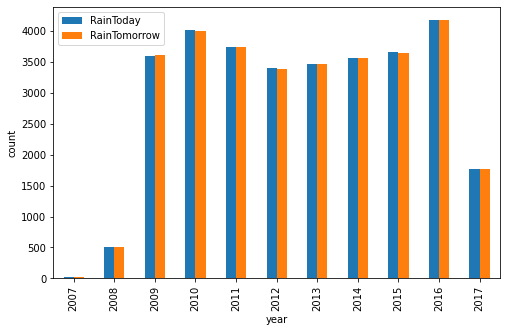

In [ ]:
eda_rain_perYear.plot(kind='bar', stacked=False, figsize=(8,5))
plt.xlabel('year')
plt.ylabel('count')
plt.show()

Pada data di atas terlihat bahwa intensitas hujan tahun 2016 lebih tinggi dari tahun lainnya. Akan dilihat persebaran intensitas hujan pada tahun 2016 per kota di Australia seperti di bawah ini

In [ ]:
eda_rain_perLoc = eda_rain.copy()
eda_rain_perLoc = eda_rain_perLoc.loc[eda_rain['year'] == 2016]
eda_rain_perLoc = eda_rain_perLoc.drop(columns=['day', 'month', 'year'], axis=1)

In [ ]:
eda_rain_perLoc = eda_rain_perLoc.groupby(['Location']).sum()
eda_rain_perLoc.head(3)

,RainToday,RainTomorrow
Location,,
Adelaide,90.0,90.0
Albany,124.0,124.0
Albury,88.0,88.0


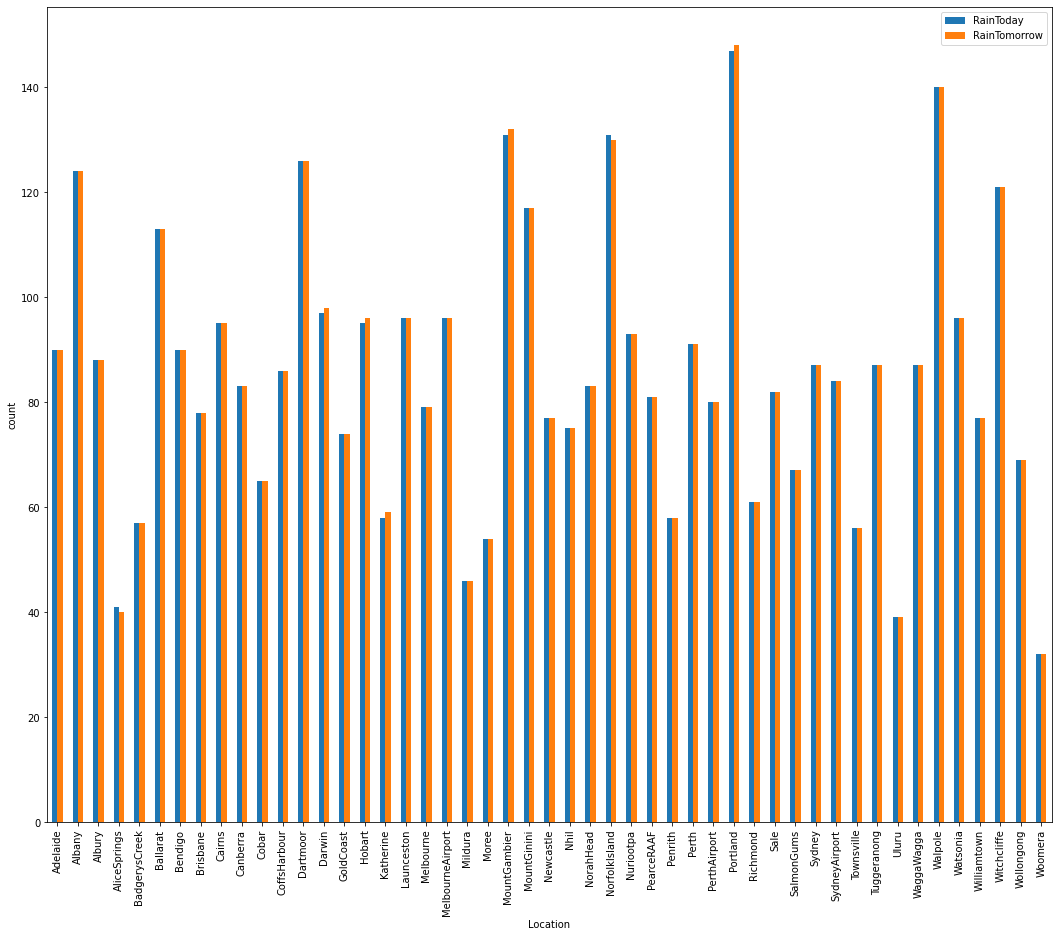

In [ ]:
eda_rain_perLoc.plot(kind='bar', stacked=False, figsize=(18,15))
plt.xlabel('Location')
plt.ylabel('count')
plt.show()

Pada data di atas, dapat disimpulkan bahwa Portland merupakan kota yang curah hujannya lebih tinggi pada data tahun 2016.

In [ ]:
data1 = eda.copy()

In [ ]:
data1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,5,12,2008


Selanjutnya, akan kita lihat persebaran data pada prediksi di kolom RainTomorrow per bulannya dengan mengelompokkan data-datanya berdasarkan kolom bulan menggunakan fitur .groupby()

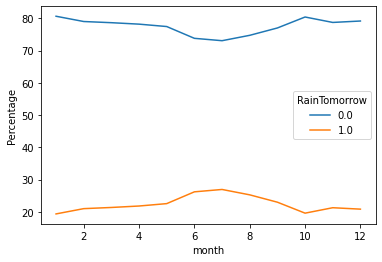

In [ ]:
month_counts = (data1.groupby(['month'])['RainTomorrow']
                .value_counts(normalize=True)
                .rename('Percentage')
                .mul(100)
                .reset_index()
                .sort_values('month'))

sb.lineplot(x='month', y='Percentage', hue='RainTomorrow', data=month_counts)

Dapat kita lihat pada kedua barplot diatas, bahwa curah hujan tertinggi terjadi pada tahun 2016 dan pada tahun tersebut, Portland menjadi wilayah yang memiliki curah hujan paling tinggi.

## Cek persebaran data target

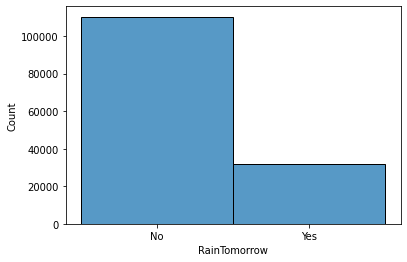

In [ ]:
sb.histplot(data['RainTomorrow'])

Dapat dilihat dari histogram diatas bahwa data target imbalanced atau tidak seimbang, sehingga kita perlu menyeimbangkan data target. Cara yang akan dipakai disini adalah undersampling dan oversampling.

# Data Cleaning

## Handling Missing Value

In [ ]:
df = data.copy()
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Mengelompokkan tipe data agar lebih mudah ketika mengatasi missing values. Dibuat variable 'numeric_columns' yang nantinya akan berisi kolom dengan tipe data numeric dan variable 'object_columns' yang nantinya akan berisi kolom dengan tipe data object.

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
object_columns = df.select_dtypes(include='object').columns.tolist()
object_columns = object_columns[0:4]

Mengisi misisng value data numeric dengan menggunakan metode rollling average.Dengan metode ini, nantinya kita dapat mengisi missing value dengan mean dari setiap 30 hari.

In [ ]:
for cols in numeric_columns:
    if df[cols].isnull().sum() != 0:
        while True:
            df[cols] = df[cols].fillna(df[cols].rolling(min_periods=1, window = 30, center=True).mean())
            if df[cols].isnull().sum() == 0:
                break

Mengisi missing value pada tipe data object dengan nilai yang paling sering keluar.

In [ ]:
for col in object_columns:
  df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

# Data Preprocessing

## Menggabungkan kolom yang saling berkaitan

In [ ]:
new_data = df.copy()

new_data['AvgTemp'] = new_data[['MinTemp', 'MaxTemp']].mean(axis=1)
new_data['AvgWindSpeed'] = new_data[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)
new_data['AvgHumidity'] =  new_data[['Humidity9am', 'Humidity3pm']].mean(axis=1)
new_data['AvgPressure'] =  new_data[['Pressure9am', 'Pressure3pm']].mean(axis=1)
new_data['AvgCloud'] =  new_data[['Cloud9am', 'Cloud3pm']].mean(axis=1)
new_data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,AvgTemp,AvgWindSpeed,AvgHumidity,AvgPressure,AvgCloud
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,6.6,16.9,21.8,No,No,18.15,22.0,46.5,1007.40,7.300000
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.333333,6.6,17.2,24.3,No,No,16.25,13.0,34.5,1009.20,5.966667
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.714286,2.0,21.0,23.2,No,No,19.30,22.5,34.0,1008.15,3.857143


Karena kita telah melakukan penggabungan feature untuk feature yang saling berkaitan, maka kita dapat melakukan drop pada feature dasar dari hasil penggabungan feature.

In [ ]:
new_data = new_data.drop(labels=['MinTemp', 'MaxTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                                 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'], axis=1)
new_data.head(3)

,Date,Location,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,AvgTemp,AvgWindSpeed,AvgHumidity,AvgPressure,AvgCloud
0,2008-12-01,Albury,0.6,12.0,12.3,W,44.0,W,WNW,16.9,21.8,No,No,18.15,22.0,46.5,1007.40,7.300000
1,2008-12-02,Albury,0.0,12.0,12.3,WNW,44.0,NNW,WSW,17.2,24.3,No,No,16.25,13.0,34.5,1009.20,5.966667
2,2008-12-03,Albury,0.0,12.0,12.3,WSW,46.0,W,WSW,21.0,23.2,No,No,19.30,22.5,34.0,1008.15,3.857143


In [ ]:
new_data['RainToday'] = new_data['RainToday'].replace(['Yes','No'], [1, 0])
new_data['RainTomorrow'] = new_data['RainTomorrow'].replace(['Yes', 'No'], [1, 0])

## Melihat Korelasi Data

In [ ]:
le = LabelEncoder()

cols_obj = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']

data_obj = new_data.copy()
data_obj = data_obj[cols_obj]

data_obj = data_obj.apply(le.fit_transform)
data_obj.head(3)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,2,13,13,14,0
1,2,14,6,15,0
2,2,15,13,15,0


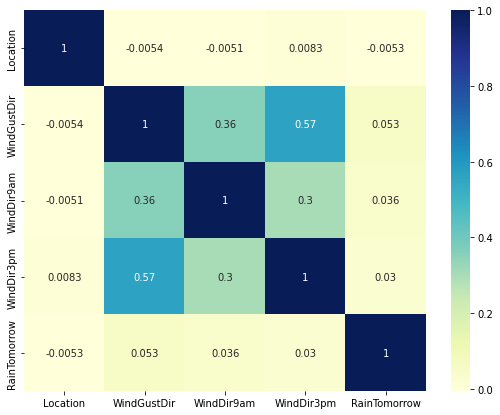

In [ ]:
plt.figure(figsize=(9, 7))
sb.heatmap(data_obj.corr(), annot=True, cmap='YlGnBu')

In [ ]:
new_data = new_data.drop(labels=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

dari korelasi di atas, dapat kita simpulkan bahwa feature-feature tersebut memiliki korelasi yang sangat rendah pada feature target. Maka kita dapat melakukan drop pada feature yang memiliki korelasi lemah tersebut.

In [ ]:
cols_temp = ['AvgTemp', 'Temp9am', 'Temp3pm', 'RainTomorrow']

data_temp = new_data.copy()
data_temp = data_temp[cols_temp]
data_temp.head(3)

,AvgTemp,Temp9am,Temp3pm,RainTomorrow
0,18.15,16.9,21.8,0
1,16.25,17.2,24.3,0
2,19.30,21.0,23.2,0


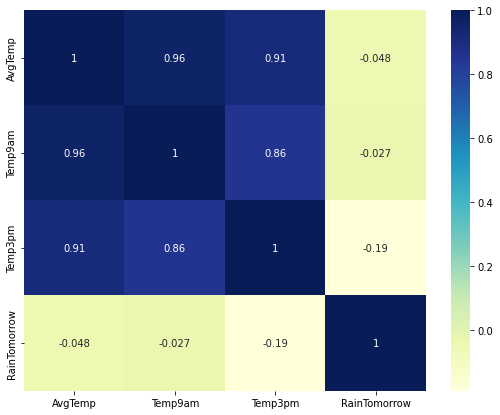

In [ ]:
plt.figure(figsize=(9, 7))
sb.heatmap(data_temp.corr(), annot=True, cmap='YlGnBu')

In [ ]:
new_data = new_data.drop(labels=['Temp9am', 'AvgTemp'], axis=1)

Karena ketiga feature tersebut menimbulkan multicolinearity, maka kita drop Temp9am dan Temp3am, sehingga nanti hanya akan tersisa AvgTemp atau rata-rata temperatur yang dapat digunakan.

In [ ]:
cols_windair = ['WindGustSpeed', 'AvgWindSpeed', 'AvgPressure', 'Evaporation', 'AvgHumidity', 'AvgCloud', 'RainTomorrow']

data_windair = new_data.copy()
data_windair = data_windair[cols_windair]
data_windair.head(3)

,WindGustSpeed,AvgWindSpeed,AvgPressure,Evaporation,AvgHumidity,AvgCloud,RainTomorrow
0,44.0,22.0,1007.40,12.0,46.5,7.300000,0
1,44.0,13.0,1009.20,12.0,34.5,5.966667,0
2,46.0,22.5,1008.15,12.0,34.0,3.857143,0


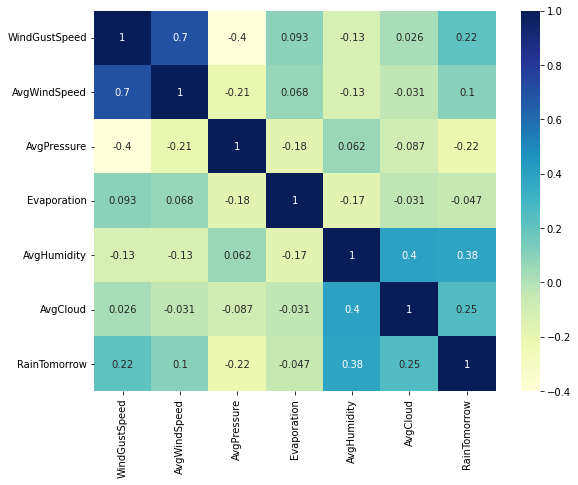

In [ ]:
plt.figure(figsize=(9, 7))
sb.heatmap(data_windair.corr(), annot=True, cmap='YlGnBu')

In [ ]:
new_data = new_data.drop(labels=['Evaporation'], axis=1)

Dapat dilihat dari heatmap diatas bahwa Evaporation memiliki korelasi lemah pada feature target, sehingga kita dapat melakukan drop pada feature tersebut. 

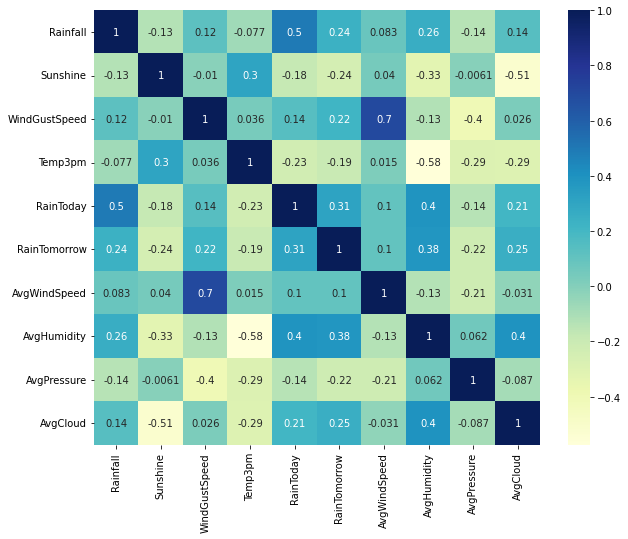

In [ ]:
plt.figure(figsize=(10, 8))
sb.heatmap(new_data.corr(), annot=True, cmap='YlGnBu')

Dilihat dari heatmap diatas,  Sunshine dan AvgHumidity memiliki korelasi yang kuat dengan AvgCloud, selain itu Rainfall memiliki korelasi yang kuat dengan RainToday, sehingga hal tersebut dapat menimbulkan multicolinearity pada data, maka kita harus melakukan drop pada feature yang memiliki korelasi yang rendah dari yang lainnya pada feature target.

In [ ]:
new_data.head(3)

,Date,Rainfall,Sunshine,WindGustSpeed,Temp3pm,RainToday,RainTomorrow,AvgWindSpeed,AvgHumidity,AvgPressure,AvgCloud
0,2008-12-01,0.6,12.3,44.0,21.8,0,0,22.0,46.5,1007.40,7.300000
1,2008-12-02,0.0,12.3,44.0,24.3,0,0,13.0,34.5,1009.20,5.966667
2,2008-12-03,0.0,12.3,46.0,23.2,0,0,22.5,34.0,1008.15,3.857143


In [ ]:
new_data = new_data.drop(labels=['Date', 'AvgWindSpeed', 'Temp3pm', 'Rainfall', 'AvgCloud'], axis=1)

In [ ]:
new_data.head(3)

,Sunshine,WindGustSpeed,RainToday,RainTomorrow,AvgHumidity,AvgPressure
0,12.3,44.0,0,0,46.5,1007.40
1,12.3,44.0,0,0,34.5,1009.20
2,12.3,46.0,0,0,34.0,1008.15


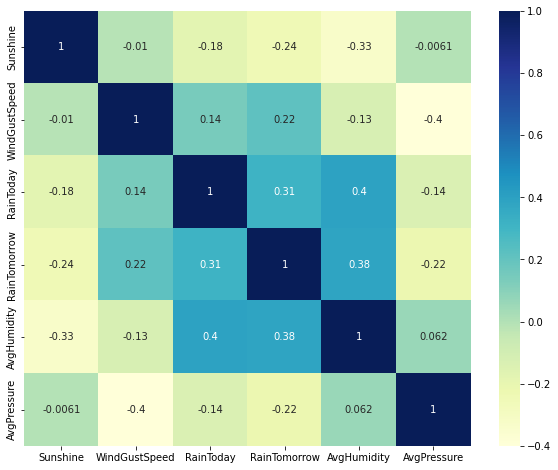

In [ ]:
plt.figure(figsize=(10, 8))
sb.heatmap(new_data.corr(), annot=True, cmap='YlGnBu')

Drop feature Date karena sudah tidak dibutuhkan. Dan juga drop feature AvgWindSpeed karena memiliki korelasi yang tinggi terhadap WindGustSpeed.

In [ ]:
column=['Sunshine',	'WindGustSpeed', 'AvgHumidity',	'AvgPressure', 'RainToday',	'RainTomorrow']

new_data = new_data[column]
new_data.head(20)

,Sunshine,WindGustSpeed,AvgHumidity,AvgPressure,RainToday,RainTomorrow
0,12.3,44.0,46.5,1007.40,0,0
1,12.3,44.0,34.5,1009.20,0,0
2,12.3,46.0,34.0,1008.15,0,0
3,12.3,24.0,30.5,1015.20,0,0
4,12.3,41.0,57.5,1008.40,0,0
5,12.3,56.0,39.0,1007.30,0,0
6,12.3,50.0,34.0,1008.90,0,0
7,12.3,35.0,33.5,1011.75,0,0
8,12.3,80.0,25.5,1006.25,0,1
9,12.3,28.0,42.5,1006.35,1,0


## Standarisasi Data

Akan kita standarisasi data yang telah kita olah 

In [ ]:
data_std = new_data.copy()

x = data_std.drop('RainTomorrow', axis=1)
y = data_std['RainTomorrow']

In [ ]:
scaler = StandardScaler()

x = scaler.fit_transform(x)

# Define, Training, dan Evaluasi Model

Untuk memudahkan kita dalam pengecekan classification report, nilai akurasi, precision score, recall score, dan f1 score, kita definisikan suatu function yang mencakup 5 hal tersebut.

In [ ]:
def apply_model(model, x_train, y_train, x_test, y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred, normalize='true')
    print('Confusion matrix:')
    sb.heatmap(cm, annot=True, cmap='YlGnBu')
    plt.title('Logistic Regression', fontsize=12)
    plt.xlabel("Predicted", fontsize=10)
    plt.ylabel("Actual", fontsize=10)
    plt.show()

    print(f'\n\nClassification Report : \n{ classification_report(y_test, y_pred)}')
    print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}\n')
    print(f'Precision Score : {precision_score(y_test, y_pred)}\n')
    print(f'Recall Score : {recall_score(y_test, y_pred)}\n')
    print(f'f1 Score : {f1_score(y_test, y_pred)}\n')

## Stage 1

### Logistic Regression

Confusion matrix:


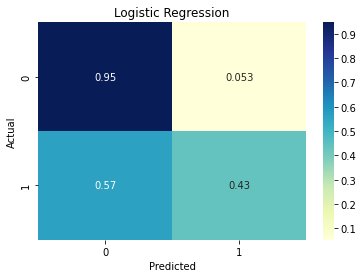



Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     32858
           1       0.70      0.43      0.54      9379

    accuracy                           0.83     42237
   macro avg       0.78      0.69      0.72     42237
weighted avg       0.82      0.83      0.82     42237

Accuracy Score : 0.8334635509150745

Precision Score : 0.7022597895463171

Recall Score : 0.4340548032839322

f1 Score : 0.5365050079072219



In [ ]:
logreg = LogisticRegression()

x_lr = x
y_lr = y

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_lr, y_lr, test_size=0.3, random_state=5)

logreg_ = logreg.fit(x_train_lr, y_train_lr)
y_pred_lr = logreg.predict(x_test_lr)

apply_model(logreg, x_train_lr, y_train_lr, x_test_lr, y_test_lr, y_pred_lr)

Dari data yang distandarisasi, diperoleh dari logistic regression, nilai akurasinya tinggi, dan precision score cukup tinggi, namun recall score dan f1 score tidak mencapai 70% karena data yang tidak balance

### SVM

Confusion matrix:


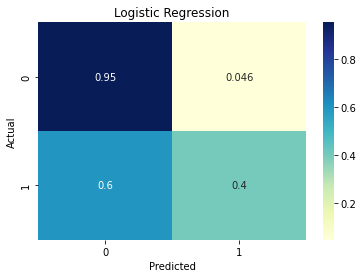



Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     32858
           1       0.71      0.40      0.51      9379

    accuracy                           0.83     42237
   macro avg       0.78      0.68      0.71     42237
weighted avg       0.82      0.83      0.81     42237

Accuracy Score : 0.8315694769988399

Precision Score : 0.7143668370244179

Recall Score : 0.4023883143192238

f1 Score : 0.5148001636884463



In [ ]:
#svm = SVC(kernel='linear')
svm = LinearSVC(random_state=0, tol=1e-5)

x_svm = x
y_svm = y

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.3, random_state=5)

svm_ = svm.fit(x_train_svm, y_train_svm.ravel())
y_pred_svm = svm.predict(x_test_svm)

apply_model(svm, x_train_svm, y_train_svm, x_test_svm, y_test_svm, y_pred_svm)

Dari data yang distandarisasi, diperoleh dari Support Vector Machine (SVM), nilai akurasinya tinggi, dan precision score cukup tinggi, namun recall score dan f1 score yang cukup jauh percentagenya dengan data score lain karena data target yang tidak balance. Oleh sebab itu, kita perlu membuat data target menjadi balance dengan menggunakan metode resampling yaitu undersampling dan oversampling

###* 

Pada data processing di stage 1 kita mendapat akurasi sekitar 83%, namun kita tidak dapat mengandalkan hasil tersebut karena data yang digunakan adalah data yang imbalanced atau tidak seimbang. Maka dari itu kita harus menggunakan teknik scoring lain yang dapat membantu kita menilai data yang kita proses, yaitu menggunakan precision, recall, dan f1 score. <br>
Pada data ini kita akan berfokus menaikkan score pada precision yang mana berfokus pada false positive. False Positive disini berarti model memprediksi akan terjadi hujan, padahal pada realita nya tidak terjadi hujan. Kita berfokus pada kenaikan false positive ini bermaksud agar orang-orang lebih aware untuk membawa payung untuk berjaga-jaga ketika hujan.

## Stage 2

 

### UnderSampling

Metode resampling dengan mengurangi data major sehingga jumlah samplenya sama. Metode ini digunakan dengan menggunakan import RandomUnderSampler()

In [ ]:
x_under = x#data_std.drop('RainTomorrow', axis=1)
y_under = y#data_std['RainTomorrow']

rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(x_under, y_under)

print(Counter(y_rus))

Counter({0: 31201, 1: 31201})


#### Logistic Regression

Confusion matrix:


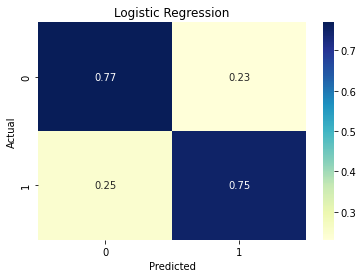



Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.77      0.76      9353
           1       0.77      0.75      0.76      9368

    accuracy                           0.76     18721
   macro avg       0.76      0.76      0.76     18721
weighted avg       0.76      0.76      0.76     18721

Accuracy Score : 0.7605362961380269

Precision Score : 0.7653449212384573

Recall Score : 0.7520281810418445

f1 Score : 0.7586281160824853



In [ ]:
logreg = LogisticRegression()

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_rus, y_rus, test_size=0.3, random_state=5)

logreg_under = logreg.fit(x_train_lr, y_train_lr)
y_pred_lr = logreg.predict(x_test_lr)

apply_model(logreg, x_train_lr, y_train_lr, x_test_lr, y_test_lr, y_pred_lr)

Setelah data target seimbang dengan menggunakan undersampling, nilai akurasi score berkurang +- 7%, sedangkan , recall score, serta f1 score meningkat cukup signifikan

#### SVM

Confusion matrix:


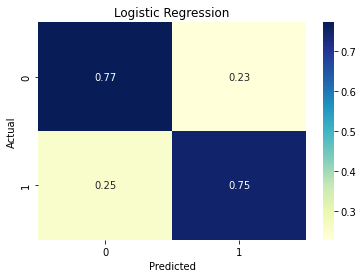



Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      9353
           1       0.77      0.75      0.76      9368

    accuracy                           0.76     18721
   macro avg       0.76      0.76      0.76     18721
weighted avg       0.76      0.76      0.76     18721

Accuracy Score : 0.7595748090379787

Precision Score : 0.7658110322228291

Recall Score : 0.748398804440649

f1 Score : 0.7570048048372293



In [ ]:
# svm = SVC(kernel='linear')
svm = LinearSVC(random_state=0, tol=1e-5)

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_rus, y_rus, test_size=0.3, random_state=5)

svm_under = svm.fit(x_train_svm, y_train_svm.ravel())
y_pred_svm = svm.predict(x_test_svm)

apply_model(svm, x_train_svm, y_train_svm, x_test_svm, y_test_svm, y_pred_svm)

Dari data yang sudah kita undersampling, classification report dari SVM juga meningkat signifikan pada bagian recall score dan f1 score. Namun pada SVM membutuhkan waktu yang lebih lama dalam execution svm.fit()

### OverSampling

In [ ]:
x_over = x
y_over = y
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x_over, y_over)

#### Logistic Regression

Confusion matrix:


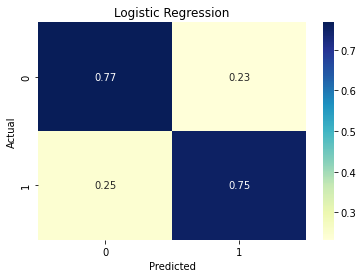



Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.77      0.76     32680
           1       0.77      0.75      0.76     33072

    accuracy                           0.76     65752
   macro avg       0.76      0.76      0.76     65752
weighted avg       0.76      0.76      0.76     65752

Accuracy Score : 0.7608285679523056

Precision Score : 0.7664516129032258

Recall Score : 0.7543541364296081

f1 Score : 0.7603547590747005



In [ ]:
logreg = LogisticRegression()

x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_ros, y_ros, test_size=0.3, random_state=5)

logreg_over = logreg.fit(x_train_lr, y_train_lr)
y_pred_lr = logreg.predict(x_test_lr)

apply_model(logreg, x_train_lr, y_train_lr, x_test_lr, y_test_lr, y_pred_lr)

Setelah data target dioleh menggunakan oversampling, sama halnya dengan undersampling, nilai akurasi menurun +- 7%, dan recall score serta f1 score meningkat secara signifikan

#### SVM

Confusion matrix:


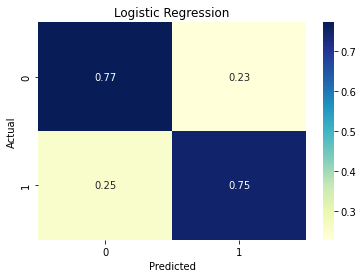



Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      9353
           1       0.77      0.75      0.76      9368

    accuracy                           0.76     18721
   macro avg       0.76      0.76      0.76     18721
weighted avg       0.76      0.76      0.76     18721

Accuracy Score : 0.7595748090379787

Precision Score : 0.7658110322228291

Recall Score : 0.748398804440649

f1 Score : 0.7570048048372293



In [ ]:
svm = LinearSVC(random_state=0, tol=1e-5)

x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_rus, y_rus, test_size=0.3, random_state=5)

svm_over = svm.fit(x_train_svm, y_train_svm.ravel())
y_pred_svm = svm.predict(x_test_svm)

apply_model(svm, x_train_svm, y_train_svm, x_test_svm, y_test_svm, y_pred_svm)

Sama halnya dengan logistic regression pada oversampling, nilai akurasi menurun +-7% namun recall score dan f1 score meningkat signifikan. Kelemahan dari metode ini yaitu SVM Oversampling membutuhkan waktu yang sangat lama dibanding SVM Undersampling.

### *

Setelah menggunakan teknik undersampling dan oversampling pada model, kita mendapatkan kenaikan sekitar 6% - 6.6% pada precision score, yang mana kenaikan score tersebut sudah cukup bagus untuk model yang kita miliki.

# Model Interference

In [ ]:
sunshine = float(input('How long does the sun shine today (in hour) : \ne.g. 12 , 10.5\n'))
windgustspeed = float(input('Today\'s highest wind speed before 12pm (in km/hour) : \ne.g. 44.0 , 43.5\n'))
avghumidity = float(input('Today\'s average humidity (in percent) : \ne.g. 50 , 25.5\n'))
avgpressure = float(input('Today\'s average air pressure (in hpa) : \ne.g. 1017.95 , 1007.40\n'))
raintoday = input('Is it raining today? \n(yes/no)\n')

input_data = [sunshine, windgustspeed, avghumidity, avgpressure]

if raintoday == 'yes':
    input_data.append(1)
elif raintoday == 'no':
    input_data.append(0)
else:
    print('Input Data is not valid, please re-input the data')

print(f'\n=============================\nYour data input is :\n{input_data}')

predict_input = logreg_over.predict([input_data])

if predict_input == 1:
	print('\n=============================\nPrediction is worth 1, then tomorrow it will RAIN')
elif predict_input == 0:
	print('\n=============================\nPrediction is worth 0, then tomorrow it will NOT RAIN')
else:
	print('\n=============================\nPrediction is not valid, please re-predict')

How long does the sun shine today (in hour) : 
e.g. 12 , 10.5
12
Today's highest wind speed before 12pm (in km/hour) : 
e.g. 44.0 , 43.5
10
Today's average humidity (in percent) : 
e.g. 50 , 25.5
30
Today's average air pressure (in hpa) : 
e.g. 1017.95 , 1007.40
1000
Is it raining today? 
(yes/no)
no

Your data input is :
[12.0, 10.0, 30.0, 1000.0, 0]

Prediction is worth 0, then tomorrow it will NOT RAIN


# Kesimpulan

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:

1. Project ini membahas tentang penerapan Supervised Machine Learning, yaitu metode Classification. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM). Tujuan dari project ini adalah mengevaluasi dan menerapkan konsep Logistic Regression dan SVM untuk metode klasifikasi pada Machine Learning. 

2. Data yang digunakan dalam project ini adalah dataset yang berisi dokumentasi kondisi cuaca dan apakah hari itu turun hujan atau tidak di beberapa daerah di Australia selama 10 tahun. Kolom RainTomorrow akan menjadi target untuk prediksi ini. Jadi, objektif dari project ini adalah berdasarkan observasi atau dokumentasi kondisi cuaca pada hari itu, apakah besoknya akan turun hujan (Yes) atau tidak (No).

3. Diketahui bahwa kolom atau fitur yang paling mempengaruhi kolom target adalah Humidity3pm. Artinya jumlah humiditas dalam persentase pada jam 3 sore memberikan pengaruh paling signifikan dalam menentukan turunnya hujan di keesokan harinya. Semakin tinggi jumlah humiditas, maka kemungkinan hujan akan semakin besar.

4. Bulan Juni-Juli adalah bulan yang memiliki intensitas hujan tertinggi. Sedangkan bulan Januari-Februari memiliki intensitas hujan terendah.

5. Algoritma model klasifikasi yang digunakan adalah Logistic Regression dan Support Vector Machine (SVM). Karena dataset yang tidak balance, nilai akurasi cenderung tinggi, sehingga kita membutuhkan metode resampling yang dapat membantu kita dalam meningkatkan nilai precision, recall, dan f1. Metode resampling ini kita buktikan metode manakah yang memiliki nilai precision, recall, dan f1 yang lebih besar. Diperoleh bahwa

      + Undersampling

        - Logistic Regression
          * Akurasi: 76.61%
          * Precision: 77.58%
          * Recall: 74.91%
          * f1 score: 76.62%

        - SVM
          * Akurasi: 76.7%
          * Precision: 77.71%
          * Recall: 74.66%
          * f1 score: 76.16%

      + Oversampling
        - Logistic Regression
          * Akurasi: 76.02%
          * Precision: 76.63%
          * Recall: 75.29%
          * f1 score: 75.95%

        - SVM
          * Akurasi: 76.6%
          * Precision: 77.71%
          * Recall: 74.66%
          * f1 score: 76.16%

6. Pada data processing di stage 1 kita mendapat akurasi sekitar 83%, namun kita tidak dapat mengandalkan hasil tersebut karena data yang digunakan adalah data yang imbalanced atau tidak seimbang. Maka dari itu kita harus menggunakan teknik scoring lain yang dapat membantu kita menilai data yang kita proses, yaitu menggunakan precision, recall, dan f1 score. <br>
Pada data ini kita akan berfokus menaikkan score pada precision yang mana berfokus pada false positive. False Positive disini berarti model memprediksi akan terjadi hujan, padahal pada realita nya tidak terjadi hujan. Kita berfokus pada kenaikan false positive ini bermaksud agar orang-orang lebih aware untuk membawa payung untuk berjaga-jaga ketika hujan. <br>Dan setelah menggunakan teknik undersampling dan oversampling pada model, kita mendapatkan kenaikan sekitar 6% - 6.6% pada precision score, yang mana kenaikan score tersebut sudah cukup bagus untuk model yang kita miliki.

7. Walaupun model SVM juga memiliki performa yang baik dan tidak terdapat perbedaan tingkat klasifikasi dengan LogisticRegression, SVM cenderung memakan waktu lebih lama dalam proses pelatihan model. Sehingga berdasarkan pelatihan model yang sudah dilakukan, algoritma yang dipilih adalah LogisticRegression Undersampling yang memiliki nilai akurasi 76.7%, nilai precision 77.71%, nilai recall 74.66%, dan nilai f1 76.16%
